In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import leastsq
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving mean.xlsx to mean.xlsx


Validation MSE: 0.05806477927606786
Validation R^2: 0.9561864749339852
Test MSE: 0.18601912474875776
Test R^2: 0.8092677214484836


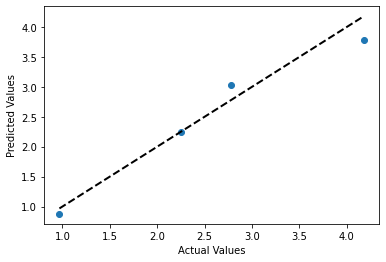

In [7]:
# Load data from CSV file
data = pd.read_excel('mean.xlsx')

# Select columns for inputs and targets
inputs = data.iloc[:, [0, 1, 3, 4]].values
targets = data.iloc[:, 5].values

# Split the data into training, validation, and test sets
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2)
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_inputs, train_targets, test_size=0.25)

# Define the function to be optimized (i.e. the model)
def model(params, inputs):
    a, b, c, d, e = params
    x1, x2, x4, x5 = inputs.T
    return a + b*x1 + c*x2 + d*x4 + e*x5

# Define the error function to be minimized (i.e. the loss function)
def error(params, inputs, targets):
    return model(params, inputs) - targets

# Set initial parameter values
params0 = np.zeros(5)

# Use the Levenberg-Marquardt algorithm to find the optimal parameter values
result = leastsq(error, params0, args=(train_inputs, train_targets), full_output=1)
opt_params = result[0]

# Use the optimal parameter values to make predictions on the validation set
val_predictions = model(opt_params, val_inputs)
val_mse = mean_squared_error(val_targets, val_predictions)
val_r2 = r2_score(val_targets, val_predictions)
print('Validation MSE:', val_mse)
print('Validation R^2:', val_r2)

# Use the optimal parameter values to make predictions on the test set
test_predictions = model(opt_params, test_inputs)
test_mse = mean_squared_error(test_targets, test_predictions)
test_r2 = r2_score(test_targets, test_predictions)
print('Test MSE:', test_mse)
print('Test R^2:', test_r2)

# Plot the predicted values against the real values for the validation set
plt.scatter(val_targets, val_predictions)
plt.plot([val_targets.min(), val_targets.max()], [val_targets.min(), val_targets.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


MSE: 0.07780921743505809
R^2: 0.9313023303847828


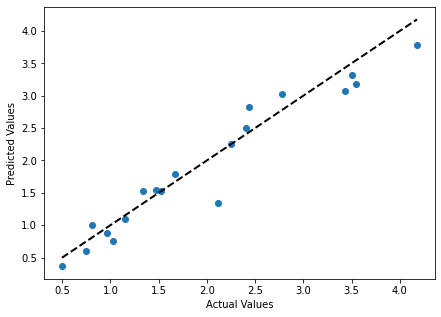

In [8]:
# Use the optimal parameter values to make predictions on all the data
predictions = model(opt_params, inputs)
mse = mean_squared_error(targets, predictions)
r2 = r2_score(targets, predictions)
print('MSE:', mse)
print('R^2:', r2)

# Plot the predicted values against the real values for all the data
fig, ax = plt.subplots(figsize=(7, 5))
plt.scatter(targets, predictions)
plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


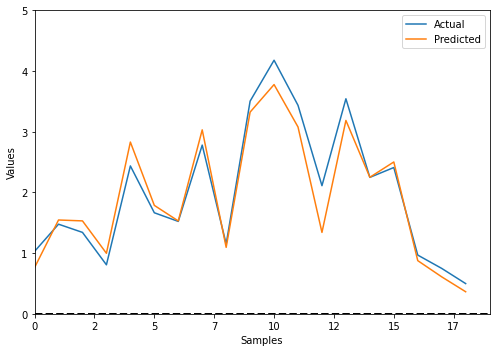

In [9]:
# Plot the actual and predicted values as a line plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(targets, label='Actual')
ax.plot(predictions, label='Predicted')
ax.plot([0, len(targets)], [0, 0], 'k--', lw=2)
ax.set_xlabel('Samples')
ax.set_ylabel('Values')
ax.set_xlim([0, len(targets)])
ax.set_ylim([0, 5])
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.legend()
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import numpy as np
from scipy.optimize import leastsq

from google.colab import files
uploaded = files.upload()


Saving mean.xlsx to mean (2).xlsx


In [38]:
import pandas as pd
import numpy as np
from scipy.optimize import leastsq
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV file
data = pd.read_excel('mean.xlsx')

# Select columns for inputs and targets
inputs = data.iloc[:, [0, 1, 3, 4]].values
targets = data.iloc[:, 5].values

# Set initial parameter values
params0 = np.zeros(5)

# Use the Levenberg-Marquardt algorithm to find the optimal parameter values
result = leastsq(error, params0, args=(inputs, targets), full_output=1)
opt_params = result[0]

# Generate predicted values for the last column
last_column_inputs = data.iloc[:, [0, 1, 3, 4]].values
last_column_predictions = model(opt_params, last_column_inputs)

# Print the predicted values for the last column
print(last_column_predictions)


[0.6928057  1.59623493 1.69042387 1.24480746 2.91524763 1.84167314
 1.54836212 2.80576767 1.11426831 3.36737612 3.93100286 3.29252467
 1.76734976 3.50765826 2.22346257 2.41047993 0.89529996 0.61761923
 0.39374483]
